In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.executing_eagerly()

True

In [2]:
x = [[2.]]
#m = tf.matmul(x, x)
m=x[0][0]*2
print("hello, {}".format(m))

hello, 4.0


In [3]:
a=tf.constant([1,2,3,4])
a=tf.add(a,2)
print(a*2)


tf.Tensor([ 6  8 10 12], shape=(4,), dtype=int32)


In [4]:
ident=tf.random.uniform(shape=[4,5],minval=1,maxval=5)#creating matrix
print(ident)
print(ident.shape)
x=tf.transpose(ident)#transpose mat
print(x)
x=tf.sin(x)#sin value of matrix
print(x)
print(tf.matmul(ident,x))#matrix mul


tf.Tensor(
[[1.8308182 2.1631207 2.8760853 4.423347  4.6399407]
 [2.0345683 1.7832918 1.694838  3.829638  1.2779174]
 [2.920703  2.7811646 1.3748522 3.6141362 2.3598952]
 [3.292646  3.2582455 4.7976165 2.2726517 1.4773798]], shape=(4, 5), dtype=float32)
(4, 5)
tf.Tensor(
[[1.8308182 2.0345683 2.920703  3.292646 ]
 [2.1631207 1.7832918 2.7811646 3.2582455]
 [2.8760853 1.694838  1.3748522 4.7976165]
 [4.423347  3.829638  3.6141362 2.2726517]
 [4.6399407 1.2779174 2.3598952 1.4773798]], shape=(5, 4), dtype=float32)
tf.Tensor(
[[ 0.96638435  0.89437157  0.21909781 -0.1504795 ]
 [ 0.8296452   0.97750765  0.35267478 -0.11638843]
 [ 0.2623989   0.99231666  0.9808643  -0.9963703 ]
 [-0.9585174  -0.6350284  -0.45515257  0.7636456 ]
 [-0.9973768   0.95741665  0.7044851   0.99563986]], shape=(5, 4), dtype=float32)
tf.Tensor(
[[-4.549046    8.239292    5.240527    4.6046705 ]
 [-1.0549413   4.0362277   1.8943018   1.99443   ]
 [-0.32725555  6.659416    2.9868374   2.9764616 ]
 [ 3.4921582  10.8618

In [5]:
a=tf.constant([1,2,3,4,4])
for i in a:
    print(i%2)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)


# Tensor flow basics

In [6]:
a = tf.constant([[1, 2],
                 [3, 4]])
b = tf.constant([[1, 1],
                 [1, 1]]) # Could have also said `tf.ones([2,2])`

print(tf.add(a, b), "\n")
print(tf.multiply(a, b), "\n")
print(tf.matmul(a, b), "\n")

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



In [7]:
print(a+b)
print(a*b)
print(tf.matmul(a, b), "\n")

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



# Deeplearning model

# Import data and purify

   Phase  Vehicle  Seats  Preorder  Status
0      1        1     10         0       0
1      1        2      7         0       0
2      3        1      9         1       1
3      1        3      9         0       1
4      1        3      7         0       1


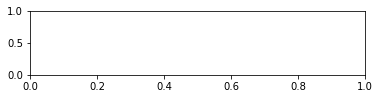

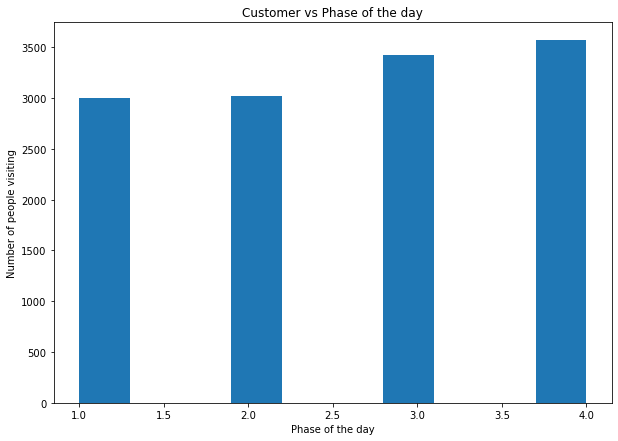

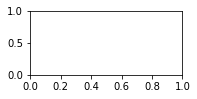

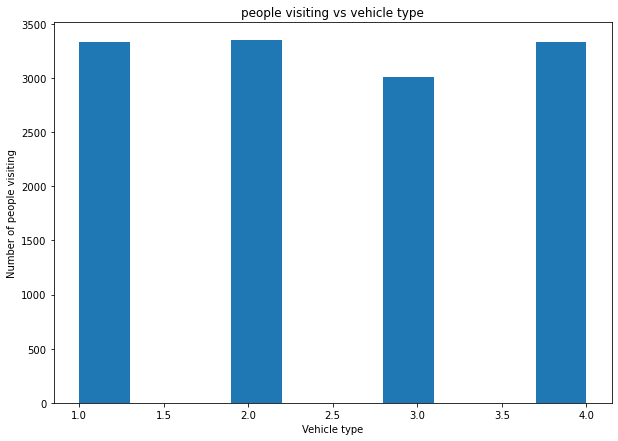

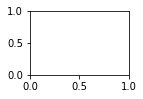

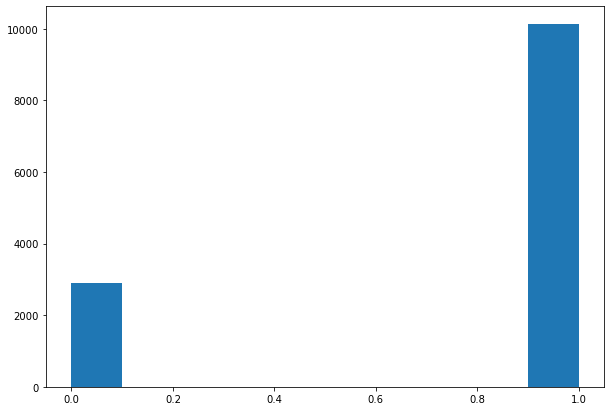

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import StratifiedShuffleSplit
df=pd.read_csv("Downloads/dataset_new.csv")
df["Vehicle"].replace(["car","bike","truck","bus"],[1,2,3,4],inplace=True)
df["Preorder"].replace([True,False],[1,0],inplace=True)
df=df[:20000]

print(df.head())
filters=df.loc[df['Status'] == 1]
x=df.drop("Status",axis=1)
y=df["Status"]
plt.subplot(3, 1, 1)
plt.figure(figsize=(10,7))
plt.hist(filters["Phase"])
plt.title("Customer vs Phase of the day")
plt.xlabel("Phase of the day")
plt.ylabel("Number of people visiting")

plt.show()
plt.subplot(3, 2, 1)
plt.figure(figsize=(10,7))
plt.hist(filters["Vehicle"])
plt.xlabel("Vehicle type")
plt.ylabel("Number of people visiting")
plt.title("people visiting vs vehicle type")

plt.show()
plt.subplot(3,3,1)
plt.figure(figsize=(10,7))
plt.hist(filters["Preorder"])

plt.show()

# Shuffle data set

In [9]:
sss = StratifiedShuffleSplit(test_size=0.2, random_state=42)
for train_index,test_index in sss.split(x,y):
    trainset=df.loc[train_index]
    testset=df.loc[test_index]
trainset.head()
train_x=trainset.drop("Status",axis=1)
train_y=trainset["Status"]
test_x=testset.drop("Status",axis=1)
test_y=testset["Status"]


# Build deep learning model

In [10]:


from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense


# define the keras model
model = Sequential()
model.add(Dense(12,input_dim=4, activation='relu'))
model.add(Dense(6, activation='swish'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(train_x, train_y, epochs=60, batch_size=10)
# evaluate the keras model
accuracy = model.evaluate(test_x,test_y)
#print((accuracy*100))




Epoch 1/20
1600/1600 [==============================] - 2s 1ms/step - loss: 0.2202 - accuracy: 0.6542 - val_loss: 0.1000 - val_accuracy: 0.8535
Epoch 2/20
1600/1600 [==============================] - 1s 721us/step - loss: 0.1000 - accuracy: 0.8525 - val_loss: 0.0989 - val_accuracy: 0.8547
Epoch 3/20
1600/1600 [==============================] - 1s 712us/step - loss: 0.0993 - accuracy: 0.8536 - val_loss: 0.1002 - val_accuracy: 0.8493
Epoch 4/20
1600/1600 [==============================] - 1s 724us/step - loss: 0.1006 - accuracy: 0.8476 - val_loss: 0.0985 - val_accuracy: 0.8530
Epoch 5/20
1600/1600 [==============================] - 1s 696us/step - loss: 0.0995 - accuracy: 0.8528 - val_loss: 0.0985 - val_accuracy: 0.8535
Epoch 6/20
1600/1600 [==============================] - 1s 709us/step - loss: 0.0980 - accuracy: 0.8559 - val_loss: 0.0981 - val_accuracy: 0.8535
Epoch 7/20
1600/1600 [==============================] - 1s 685us/step - loss: 0.0982 - accuracy: 0.8526 - val_loss: 0.0993 - v

In [11]:
print((accuracy))
temp1=[[2,2,1,0]]
print(model.predict(temp1)[0][0]*100)


[0.09818414598703384, 0.8535000085830688]
16.558396816253662
